# Lab 8
<br>

# Object-Oriented Programming (OOP)
---

##### CS1P. Semester 2. Python 3.x
##### This lab was prepared by John H. Williamson 
 ---

In [26]:
from utils.tick import tick

## Purpose of this lab
This lab will exercise your skills in:

* writing classes
* representing data as dictionaries
* using dictionaries to package up arguments
* flying drones (badly)


# A. Quick problems

# A.1 Data class

Define a class `Cat`, with  an `__init__` method that sets instance variables `name, weight, age, temperament` and `colour`.

In [4]:
## Solution
class Cat:
    def __init__(self, name, weight, age, temperament, colour):
        self.name = name
        self.weight = weight
        self.age = age
        self.temperament = temperament
        self.colour = colour

In [5]:
## Tests
with tick():
    c = Cat("Cooper", 4.0, 4, "terrible", "gray")
    assert hasattr(c, "name") and c.name=="Cooper"
    assert hasattr(c, "weight") and c.weight==4.0
    assert hasattr(c, "age") and c.age==4
    assert hasattr(c, "temperament") and c.temperament=="terrible"
    assert hasattr(c, "colour") and c.colour=="gray"    

# A.2 Family names

Create a class `FamilyName` that has an instance variable `first_name` and a **class** variable `last_name`, initialised to "Unknown". 

* Make the constructor (`__init__`) take `first_name` as an argument.
* Add an *instance* method `set_last_name` that sets *every* `FamilyName` instance's `last_name`.
* Add a method `get_name` which returns the first and last name joined together with a space.


In [10]:
## Solution
class FamilyName:
    
    last_name = "Unknown"
    
    def __init__(self, first_name):
        self.first_name = first_name
        
    def set_last_name(self, last_name):
        FamilyName.last_name = last_name
        
    def get_name(self):
        return f"{self.first_name} {FamilyName.last_name}"


'John qnko'

In [11]:
## Tests
with tick():
    nm_1 = FamilyName("John")    
    nm_1.get_name()

    nm_1.set_last_name("Williamson")
    assert nm_1.get_name() == "John Williamson"

    nm_2 = FamilyName("Marco")
    assert nm_2.get_name() == "Marco Williamson"

    nm_1.set_last_name("Polo")
    assert nm_2.get_name() == "Marco Polo"
    assert nm_1.get_name() == "John Polo"

# A.3 Convert a dictionary

The following code defines a list of dictionaries representing different types of dice used in board games, and some functions that operate on those dictionaries. Rewrite this as a class `Die`, where the keys of the dictionaries become instance variables, and the functions defined become methods operating on `self`.

Then, create a list called `dice_class` of instances of `Die` *initialising the values from the dictionary.*

In [13]:
import random

dice = [
    {"name": "d6", "sides": 6, "shape": "cube"},
    {"name": "d4", "sides": 4, "shape": "tetrahedron"},
    {"name": "d12", "sides": 12, "shape": "dodecahedron"},
    {"name": "d8", "sides": 8, "shape": "octahedron"},
    {"name": "d20", "sides": 20, "shape": "icosahedron"},
]

def roll_die(die):
    return random.randint(1, die["sides"])

def opposite_face_sum(die):
    if die["sides"]>4:
        return die["sides"]+1
    else:
        raise ValueError("Die has no opposing sides!")

In [19]:
import random
## Solution
class Die:
    def __init__(self, name, sides, shape):
        self.name = name
        self.sides = sides
        self.shape = shape
        
    def roll_die(self):
        return random.randint(1, self.sides)
    
    def opposite_face_sum(self):
        if self.sides > 4:
            return self.sides + 1
        else:
            raise ValueError("Die has no opposing sides")

dice_class = [
    Die("d6", 6, "cube"),
    Die("d4", 4, "tetrahedron"),
    Die("d12", 12, "dodecahedron"),
    Die("d8", 8, "octahedron"),
    Die("d20", 20, "icosahedron")
]

In [20]:
## Tests
with tick():
    
    assert len(dice_class)==len(dice)
    assert dice_class[0].__class__.__name__=="Die"
    assert dice_class[0].name == dice[0]["name"]
    assert dice_class[0].sides == dice[0]["sides"]
    assert dice_class[0].shape == dice[0]["shape"]
    for d in dice_class:
        print(f"{d.name} rolled a {d.roll_die()}")

    assert dice_class[0].opposite_face_sum()==7    
    assert dice_class[-1].opposite_face_sum()==21    

d6 rolled a 5
d4 rolled a 4
d12 rolled a 7
d8 rolled a 3
d20 rolled a 11


# A.4 Fraction

Define a class `Fraction` that takes two arguments (numerator and denominator) in `__init__`. Define the following methods:

* `as_float(self)` returns the fraction as a floating point number (by dividing the numerator by the denominator)
* `as_string(self)` returns the fraction as a string, like "9/8"
* `multiply(self, fraction)` that multiplies the given fraction by *another* instance of `Fraction` (note the rule for multiplying fractions is `a/b * c/d = a*c / b*d`) and returns a new instance of Fraction.



In [27]:
## Solution
class Fraction:
    
    def __init__(self, numerator, denominator):
        self.numerator = numerator
        self.denominator = denominator
        
    def as_float(self):
        return self.numerator / self.denominator
    
    def as_string(self):
        return str(self.numerator) + "/" + str(self.denominator)
    
    def multiply(self, fraction):
        numerator_mul = self.numerator * fraction.numerator
        denomirator_mul = self.denominator * fraction.denominator
        return Fraction(numerator_mul, denomirator_mul)


'2.0/5.9'

In [28]:
## Tests
with tick():
    half = Fraction(1,2)
    two_third = Fraction(2, 3)
    three_eight = Fraction(3, 8)
    assert half.as_float()==0.5
    assert three_eight.as_float()==3.0/8.0    
    assert two_third.as_string()=="2/3"
    assert half.as_string()=="1/2"
    prod = half.multiply(two_third)
    assert prod.as_float() == (1/2) * (2/3)    
    assert prod.as_string() ==  "2/6"
    assert half.as_float()==0.5
    assert half.as_string()=="1/2"
            

# A.5 Fraction special methods
Modify `Fraction` defined above:

* modify `multiply` so that if the "other" value passed is an instance of  `Fraction`, you multiply as before; if it is an instance of `int` then you multiply the numerator by that integer; and otherwise you raise a `TypeError`.

And add two new methods:

* `__str__(self)`, which just calls `self.as_string` and returns the result;
* `__mul__(self, other)`, which just calls `self.multiply` and returns the result

Verify that you can now:

(a) print out any instance of `Fraction` and see the string value directly;

(b) write products of fractions using the ordinary `*` operator. For example, `print(Fraction(2,3) * Fraction(1,2))` should print `2/6`.


In [41]:
## Solution
class Fraction:
    
    def __init__(self, numerator, denominator):
        self.numerator = numerator
        self.denominator = denominator
        
    def as_float(self):
        return self.numerator / self.denominator
    
    def as_string(self):
        return str(self.numerator) + "/" + str(self.denominator)
    
    def multiply(self, other):
        if type(other) == int:
            return Fraction(self.numerator * other, self.denominator)
        elif type(other) == Fraction:     
            numerator_mul = self.numerator * other.numerator
            denomirator_mul = self.denominator * other.denominator
            return Fraction(numerator_mul, denomirator_mul)
        else:
            raise TypeError("This type is not supported!")
    
    def __mul__(self, other):
        return self.multiply(other)
    
    def __str__(self):
        return self.as_string()
    

2/2
2/2


In [42]:
## Tests
with tick():
    half = Fraction(1,2)
    print(half)
    print(half * half)
    print(half * 4)
    assert str(half)=="1/2"    
    two_third = Fraction(2, 3)
    assert str(two_third)=="2/3"
    prod = half * two_third
    assert str(prod)=="2/6"
    assert str(half.multiply(2)) == "2/2"
    assert str(half * 2) == "2/2"
    try: 
        half * 2.0
    except TypeError:
        assert True
    else:
        assert False, "Didn't fail when multiplying by an float"

1/2
1/4
4/2


# A.6 Type collection

You can get the name of the type of an object using  `type(x).__class__.__name__`. For example:

In [13]:
print((4).__class__.__name__) # int
print(("hey").__class__.__name__) # string
print(({}).__class__.__name__) # dictionary

int
str
dict


Write a class `TypeCollection`. This class will represent a container that can hold objects of different types, but each type has its own separate "space". For example, all ints are held separately from all floats. 

<div class="alert alert-info">
    
Hint: use an internal dictionary to map the *name* of the type to a list of objects.
</div>

The class should have the following methods:
    
* `add(self, obj)` which adds `obj` to a collection
* `remove(self, obj)` which removes `obj` from a collection (and raises a `ValueError` if the object is not present).
* `remove_all(self, typename)` which removes all objects of type `typename` from the collection
* `get_all(self, typename)` which returns all objects of the type `typename`, as a list.
* `__str__(self)` which returns a string with all of the objects laid out like this (sorted alphabetically in order by name of type):

        float
            1.0
        int
            9
            2
        str
            1
            hey
        tuple
            (3, 4)

In [16]:
## Solution
class TypeCollection:
    
    def __init__(self, dictionary = {}):
        self.dictionary = dictionary
        
    def add(self, obj):
        type_name = obj.__class__.__name__
        
        if type_name not in self.dictionary:
            self.dictionary[type_name] = []
        
        if obj not in self.dictionary[type_name]: 
            self.dictionary[type_name].append(obj)
            
        
    def remove(self, obj):
        type_name = obj.__class__.__name__
        self.dictionary[type_name].remove(obj)
        
    def remove_all(self, typename):
        self.dictionary[typename].clear()
        
    def get_all(self, typename):
        return self.dictionary[typename]
    
    def __str__(self):
        string_builder = ""
        for key in sorted(self.dictionary):
            mapped_list = map(str, self.dictionary[key])
            str_list = "   " + "\n   ".join(mapped_list)
            string_builder += f"{key}\n{str_list}\n"
        return string_builder
        

In [17]:
## Tests

t = TypeCollection()
t.add(1)
t.add(1.0)
t.add("1")
t.add("hey")
t.add(9)
t.add(2)
t.add((3, 4))
t.remove(1)
with tick():
    assert t.get_all("int")==[9,2]
    assert t.get_all("str")==["1","hey"]
    assert t.get_all("tuple")==[(3,4)]
    t.remove_all("int")
    assert t.get_all("int")==[]
    

# B. Flying drones
We are going to use object-orientation to do some simple drone flying; or at least creating paths for drones to follow.

<img src="imgs/drone.jpg" width="50%">

# B.1 Vec3

We need a way to represent a drone in space. For the moment, we'll ignore the orientation of the drone. A point in space can be referenced with three coordinates $x,y,z$. Obviously, we could use a list, tuple or NumPy array to represent a point. But it can be useful to define a type that represents a fixed length vector with three *components* and can do the kind of operations we want to be able to do directly.

Define a new class `Vec3` that has the following methods. Note: we will not mutate `Vec3` after creation, so all methods return *new instances*. There are a few methods to implement, but all of them are very simple.

* `__init__(self, x, y, z)`
* `as_list(self)` returns the Vec3 as a list `[x,y,z]`
* `__add__(self, other)` add two Vec3 together by adding their components, returning a new `Vec3`
* `__mul__(self, scale)` multiply each component of Vec3 by the given number `scale` (`scale` is a number, **not** a `Vec3`!). This method returns a new `Vec3`.
* `__truediv__(self, scale)` divide each component of Vec3 by the given number `scale` (`scale` is a number, **not** a `Vec3`!)
* `length(self)`  returns $\sqrt{x^2+y^2+z^2}$
* `direction(self)` multiply each component of Vec3 by `1/length(self)` (`length(self)` is an instance method!). This method returns a new `Vec3`.
* `__matmul__(self, other)` returns the dot product of two vectors, that is a number $(x_1*x_2) + (y_1*y_2) + (z_1*z_2)$
* `__sub__(self, other)` subtract the components of two Vec3, returning a new `Vec3`
* `distance(self, other)` returns `length(self-other)`, the distance between two vectors
* `__str__(self)` returns the vector as a string like `<1.0 0.5 0.1>`
* `__eq__(self, other)` returns True if the `distance` between `self` and `other` is less than `1e-6` (we won't use exact equality for numerical reasons). Also, use the `distance` method you implemented for the `Vec3` class.

<div class="alert alert-info">
    Remember, to use any instance method defined within the class, use <b>self.name_of_method(...)</b>
</div>

In [27]:
## Solution
import math

# Note: completely fine to use a three element list, tuple
# or numpy array instead of the three member variables.

class Vec3:
    def __init__(self, x, y ,z):
        self.x = x
        self.y = y
        self.z = z
        self.list = [x, y, z]
    
    #returns the coordinates as a list
    def as_list(self):
        return self.list
    
    #adds two vectors
    def __add__(self, other):
        result = list(map(lambda x, y: x + y, self.list, other.list))
        return Vec3(result[0], result[1], result[2])
    
    #multiplies every vector coordinate with a given scale
    def __mul__(self, scale):
        result = list(map(lambda x: x * scale, self.list))
        return Vec3(result[0], result[1], result[2])
    
    #divides every vector coordinate with a given scale
    def __truediv__(self, scale):
        result = list(map(lambda x: x / scale, self.list))
        return Vec3(result[0], result[1], result[2])
    
    #returns the length of the vector
    def length(self):
        length = 0
        for element in self.list:
            length += element ** 2
        return math.sqrt(length)
    
    #returns the direction of the vector
    def direction(self):
        result = list(map(lambda x: x * (1 / self.length()), self.list))
        return Vec3(result[0], result[1], result[2])
    
    #returns the dot product of two vectors
    def __matmul__(self, other):
        result = 0
        for self_elt, elt in zip(self.list, other.list):
            result += self_elt * elt
        return result
    
    #substracts two vectors
    def __sub__(self, other):
        result = list(map(lambda x, y: x - y, self.list, other.list))
        return Vec3(result[0], result[1], result[2])
    
    #returns the distance between two vectors
    def distance(self, other):
        sub_vector = self - other 
        return sub_vector.length()
    
    #returns True if two vectors are equal and False otherwise
    def __eq__(self, other):
        if self.distance(other) < 1e-6:
            return True
        else:
            return False
    
    #formatting the coordinates into a vector
    def __str__(self):
        return f"<{self.list[0]} {self.list[1]} {self.list[2]}>"


In [28]:
## Tests
v1 = Vec3(1, 2, 3)
v2 = Vec3(1.0, 0.0, 1.0)
v3 = Vec3(1.0, 0.0, 0.0)
v4 = Vec3(10.0, 0.0, 0.0)
v5 = Vec3(0.0, 0.0, 1.0)

print(v1, v2, v3)
print(v1 * 2)
print(v1 + v2 - v3 + v4 - v5 * 2)
print(v3.length())

with tick():
    assert v3 * 10 == v4
    assert v4 / 10 == v3
with tick():
    assert v1 - v2 == Vec3(0, 2, 2)
    assert v1 + v2 == Vec3(2, 2, 4)
    assert v3 + v5 == Vec3(1, 0, 1)
with tick():
    assert v3.length() == v5.length()
    assert v1.length() == 14**0.5
    assert v3.length() == 1.0
with tick():
    assert v3.distance(v5) == 2.0**0.5
    assert v4.direction() == v3
    assert v5.direction() == v5
# @ calls __matmuL__s
with tick():
    assert v3 @ v3 == 1.0
    assert v3 @ v5 == 0.0
with tick():
    assert v3.as_list() == [1.0, 0.0, 0.0]
    assert (v3*2).as_list() == [2.0, 0.0, 0.0]

#assert v3 @ v3 == 1.0

<1 2 3> <1.0 0.0 1.0> <1.0 0.0 0.0>
<2 4 6>
<11.0 2.0 2.0>
1.0


# B.2 Path
Now we need to represent a path along which we intend to send the drone. Again, this is something we can represent as an object, with a specific set of methods we can use to operate upon it.

A path is a sequence of points in space, each with a time. To do this, we need to be able to specify the points in space (as `Vec3`s) we want to reach at each time point, and be able to get the point the drone is supposed to be at for *any* possible time. We'll store this as a sequence of `(time, point)` pairs, where `time` is a floating point number.

To do this, we'll assume that the drone is expected to move in a perfectly straight line between two given points, and use the simple *linear interpolation formula* to compute the position of a drone. 

Create a class `Path` that has the following methods. These define the API (application programmer's interface) that we can use to manipulate `Path`s.

* `__init__` which initialises an empty path
* `add(self, pt, t)` adds as a tuple/list, a new point `pt` (a `Vec3`) to be reached at time `t` (a floating point number). 
* `get(self, t)` return the position the drone should be at time `t`. To find the this point:
    * If there are no points in the path, raise a `ValueError` 
    * If there is just one point, return it
    * if `t` is smaller than any time in the path, return the point with smallest `t`
    * if `t` is greater than any time in the path, return the point with largest `t`
    * otherwise:
        * find the first time in the list greater than `t`, `t2` and the corresponding point in space `p2`
        * find the immediately previous point (in the sense of time) in the list `p1` and its time `t1`
        * compute the position `p` of the drone at time `t` using the formula:
            * `a = (t - t1) / (t2 - t1)`
            * `p = p1 * (1-a)  + p2* a`
* `t_range(self)`, which returns the minimum and maximum value of `t` in the sequence, as a tuple. 
    
* Note: you can (but definitely don't have to) store the list of times and points in sorted order, and use binary search to find the times. This is more efficient than the simple approach but more complicated to get right.
    

In [34]:
## Solution
def insert_tuple(l, element):
    diff = element[1]
    index = 0
    for i,elt in enumerate(l):
        if abs(elt[1] - element[1]) < diff:
            diff = abs(elt[1] - element[1])
            index = i

    if l[index][1] >= element[1]:
        l.insert(index, element)
    else:
        l.insert(index + 1, element)
    return l

def binary_search_tuples(l, elt, low = 0):
    if low == len(l) - 1 or l[low][1] - elt > 0:
        return l[low - 1], l[low]
    else:
        return binary_search(l, elt, low + 1)

class Path:
    def __init__(self):
        self.path = []
        
    #adding a point at a specific time
    def add(self, pt, t):
        if len(self.path) != 0:
            #using an insert method to keep the path sorted
            self.path = insert_tuple(self.path, (pt,t)) 
        else:
            self.path.append((pt, t))
        
    def get(self, t):
        try:
            if len(self.path) == 0:
                raise ValueError
        except ValueError:
            return "There are no points in the path!"
        
        #finding the first and the last point according to time
        point_min_time = self.path[0]
        point_max_time = self.path[len(self.path)-1]
        
        #if the path consists only one point then this point is returned
        if len(self.path) == 1:
            return self.path[0][0]
        #if the given time is smaller than the time of the first point
        #then it returns the first point
        elif point_min_time[1] > t:
            return point_min_time[0]
        #if the given time is bigger than the time of the last point
        #then it returns the last point
        elif point_max_time[1] < t:
            return point_max_time[0]
        #otherwise it gets the points closest to the specified time
        #and computes the position using the linear interpolation formula
        else:
            point_1, point_2 = binary_search_tuples(self.path, t)
            pt1, t1 = point_1[0], point_1[1]
            pt2, t2 = point_2[0], point_2[1]
            
            a = (t - t1) / (t2 - t1)
            position = pt1 * (1-a)  + pt2 * a
            return position
        
    #it returns the time of the first and the last points
    def t_range(self):
        return (self.path[0][1], self.path[len(self.path)-1][1])
    
    #formatting the output of the path
    def __str__(self):
        string_builder = ""
        for elt in self.path:
            string_builder += f"{elt[0]}, {elt[1]}\n"
        return string_builder
    
        

In [35]:
## Tests
p = Path()
p.add(Vec3(0,0,0), 0.0)
with tick():
    try:
        p.get(0)
    except ValueError:
        assert True
p.add(Vec3(1,0,0), 1.0)
with tick():
    assert p.t_range() == (0.0, 1.0)
with tick():
    assert p.get(0.0) == Vec3(0,0,0)
    assert p.get(1.0) == Vec3(1,0,0)
p.add(Vec3(1,0,1), 2.0)    
with tick():
    assert p.get(2.0) == Vec3(1,0,1)
    
    assert p.get(0.5) == Vec3(0.5, 0, 0)
    assert p.get(0.25) == Vec3(0.25, 0, 0)
    assert p.get(1.5) == Vec3(1, 0, 0.5)
    assert p.t_range() == (0.0, 2.0)
    
with tick():    
    p.add(Vec3(0,1,0), 0.5)
    assert p.get(0.5) == Vec3(0,1,0)
    assert p.get(0.25) == Vec3(0,0.5,0)
    assert p.get(0.75) == Vec3(0.5,0.5,0)
    
p.add(Vec3(1,0,1), -2.0)    
with tick():
    assert p.t_range() == (-2.0, 2.0)
    assert p.get(-2)==Vec3(1,0,1)

# Displaying a path
The drone simulator knows how to work with `Path` objects, so we can now do our first test. However, the drone currently lacks a controller, so it will be unable to fly. We'll see the path, though.



In [36]:
drone_path = Path()
# on ground
drone_path.add(Vec3(0,0,0), 0)
# up
drone_path.add(Vec3(0,0,2), 1)
# forward, up
drone_path.add(Vec3(5,0,5), 5)
# left
drone_path.add(Vec3(5,7,7), 10)
# backward
drone_path.add(Vec3(-5,7,7), 15)
# right
drone_path.add(Vec3(-5,-7,5), 20)
# forward
drone_path.add(Vec3(5,-7,5), 25)
# left
drone_path.add(Vec3(5,0,5), 30)
# home
drone_path.add(Vec3(0,0,0), 35)

We can now see the path generated.

<IPython.core.display.Javascript object>


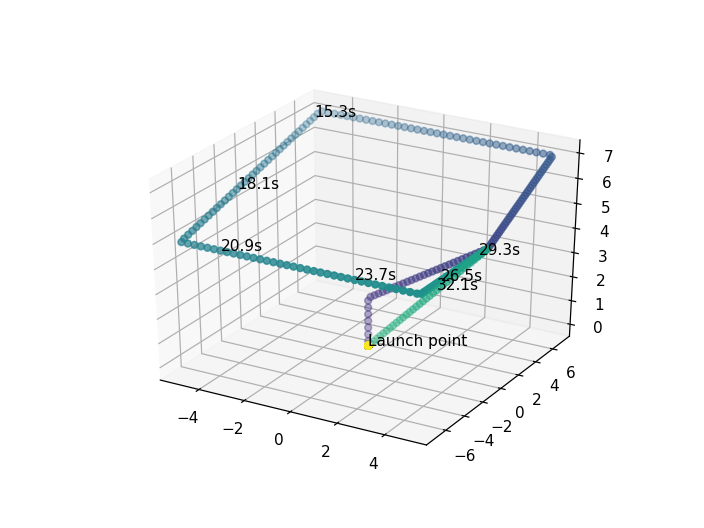

In [37]:
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# show the drone path
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# sample a path at regular points
def sample_path(path, ts):
    return np.array([path.get(t).as_list() for t in ts])
   
# plot the drone path    
times = np.linspace(-10, 60, 500)
label_times = times[180:-180:20]
np_path = sample_path(drone_path, times)
ax.scatter(np_path[:,0], np_path[:,1], np_path[:,2], cmap='viridis', c=times)
ax.text(0,0,0,"Launch point")

# show some time labels on the path
for t in label_times:
    # we can sample at *any* time, which makes this easy to write
    drone_pt = drone_path.get(t)
    ax.text(drone_pt.x, drone_pt.y, drone_pt.z, f"{t:.1f}s")


#  C. Extended problems
These *extended* problems are optional for students who are keen to learn more. If you've finished the whole lab and want to explore these ideas in more depth, these problems and resources are intended to help you do that. <font color="red"> You do not need to attempt any of this section to receive a tick! </font>

## C.1  Manufacturing vectors
In Python, we can create classes *dynamically* (as well as instances), using the `type` function. See the example below, or look at this [tutorial](https://www.python-course.eu/python3_classes_and_type.php) for more information.

In [44]:
def hello_init(self, name):
    # there is nothing special
    # about self; it's just a reference
    # to the instance    
    self.name = name
    
# type(classname, superclasses, attributedictionary)    
# we won't use superclasses here
Hello = type("Hello", (), {         
        "__init__": hello_init,
         # could also use lambda if we want
         "__repr__": lambda self:  "Hello, "+ self.name
})
h = Hello("EVERYONE!")

print(h)
other_h = h.__class__("you")
print(other_h)

Hello, EVERYONE!
Hello, you


Write a function `make_vec(n)` which returns a class `Vec<n>` (like `Vec3` or `Vec4`) that returns a class that performs the same operations as `Vec3` did, but for `n` element vectors.

In [45]:
## Solution


In [43]:
## Tests
Vec4 = make_vec(4)
v4 = Vec4(1,2,3,4)
print(v4.length())
v4_2 = Vec4(1,0,0,1)
print(v4_2)
print(v4 + v4_2)
print(v4 @ v4_2)
print(v4 * 3)



5.477225575051661
<1.0 0.0 0.0 1.0>
<2.0 2.0 3.0 5.0>
5
<3.0 6.0 9.0 12.0>
